In [1]:
import os
import dill
from gensim.models.poincare import PoincareModel

In [2]:
relations = dill.load(open("data/relations_kuchiku.dill", "rb"))
print(len(relations))

207


In [3]:
if not os.path.exists("data/model_kuchiku.dill"):
    model = PoincareModel(relations, size=2)
    model.train(epochs=1000)

    with open("data/model_kuchiku.dill", "wb") as f:
        dill.dump(model, f)

In [4]:
## Plot

In [5]:
import plotly
import gensim.viz.poincare

# kuchikukan
model = dill.load(open('./data/model_kuchiku.dill','rb'))

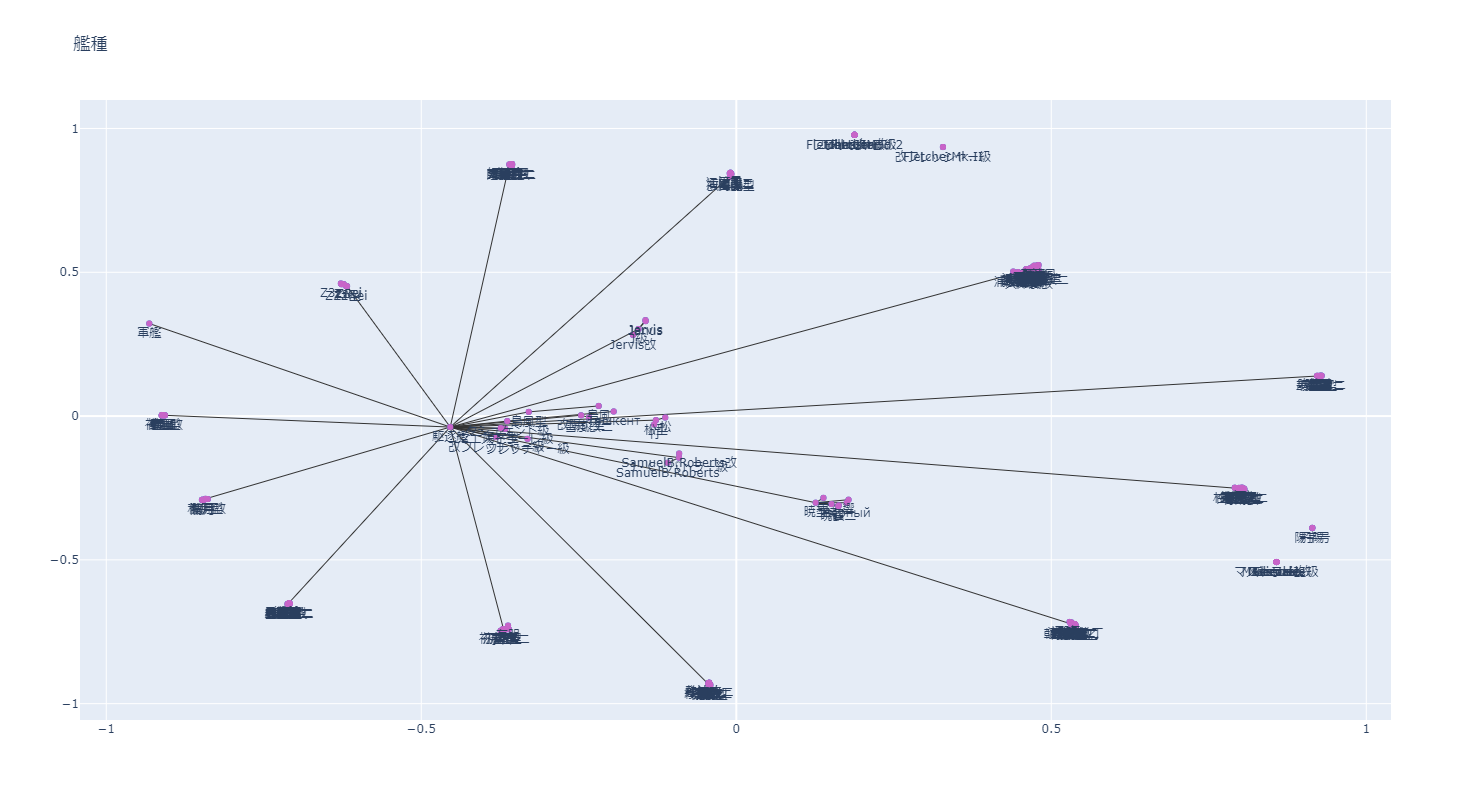

In [6]:
plotly.offline.init_notebook_mode(connected=True)
prefecutre_map = gensim.viz.poincare.poincare_2d_visualization(model=model,
                                                               tree=relations,
                                                               figure_title="艦種",
                                                               show_node_labels=model.kv.vocab.keys())
plotly.offline.iplot(prefecutre_map)